# Basic Transforms in Pytorch

Let's do some basic image transformations using the `torchvision` library.  Use the following link to find [the full documentation for the torchvision transforms library](https://pytorch.org/vision/stable/transforms.html).

Let's start by downloading the head shots of your two favorite profs.

In [1]:
!wget 'https://www.olin.edu/sites/default/files/styles/card/public/2023-09/Ruvolo%2C%20Paul-uncropped.jpg' -O paul.jpg
!wget 'https://www.olin.edu/sites/default/files/styles/card/public/2022-11/SamMichalka.jpg' -O sam.jpg

--2024-09-09 11:33:16--  https://www.olin.edu/sites/default/files/styles/card/public/2023-09/Ruvolo%2C%20Paul-uncropped.jpg
Resolving www.olin.edu (www.olin.edu)... 54.225.220.247
Connecting to www.olin.edu (www.olin.edu)|54.225.220.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25385 (25K) [image/jpeg]
Saving to: ‘paul.jpg’

paul.jpg            100%[===================>]  24.79K  --.-KB/s    in 0.001s  

2024-09-09 11:33:16 (33.7 MB/s) - ‘paul.jpg’ saved [25385/25385]

--2024-09-09 11:33:16--  https://www.olin.edu/sites/default/files/styles/card/public/2022-11/SamMichalka.jpg
Resolving www.olin.edu (www.olin.edu)... 54.225.220.247
Connecting to www.olin.edu (www.olin.edu)|54.225.220.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35235 (34K) [image/jpeg]
Saving to: ‘sam.jpg’

sam.jpg             100%[===================>]  34.41K  --.-KB/s    in 0.001s  

2024-09-09 11:33:17 (40.6 MB/s) - ‘sam.jpg’ saved [35235/35235]



Let's see what we're dealing with here.

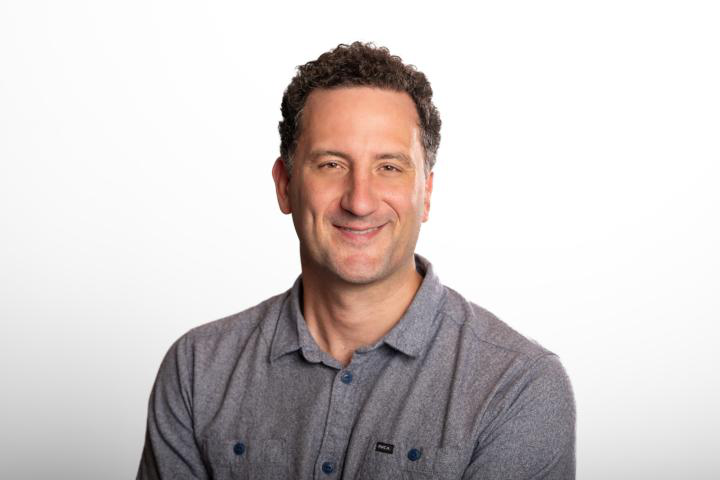

Paul's head shot is 720 pixels wide by 480 pixels high


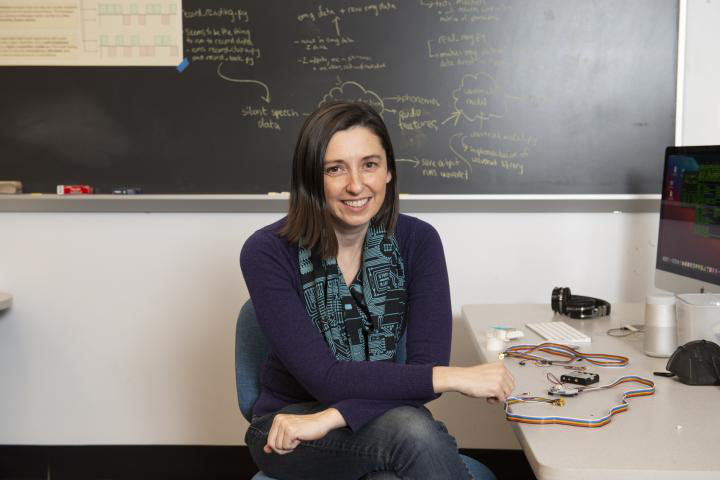

Sam's head shot is 720 pixels wide by 480 pixels high


In [2]:
from PIL import Image

paul = Image.open('paul.jpg')
sam = Image.open('sam.jpg')
display(paul)
print(f"Paul's head shot is {paul.width} pixels wide by {paul.height} pixels high")
display(sam)
print(f"Sam's head shot is {sam.width} pixels wide by {sam.height} pixels high")

Let's try our first transformation.  We'll look at the documentation to understand what's going on here.  You'll notice that there are version 2 transforms for `torchvision`.  You are welcome to explore those as well.  We decided to use original transforms in this notebook (and in the homework assignment).

In [3]:
from torchvision import transforms

t1 = transforms.Compose([transforms.Resize(256)])
paul_transformed = t1(paul)
display(paul_transformed)
print(f"Transformed image is {paul_transformed.width} pixels wide by {paul_transformed.height} pixels high")

ModuleNotFoundError: No module named 'torchvision'

It's very common to crop an image to introduce additional variability into the dataset.  You have to be careful about the specific choices of crops though.

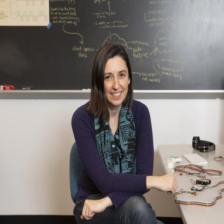

Transformed image is 224 pixels wide by 224 pixels high


In [ ]:
t2 = transforms.Compose([transforms.RandomResizedCrop(224)])
sam_transformed = t2(sam)
display(sam_transformed)
print(f"Transformed image is {sam_transformed.width} pixels wide by {sam_transformed.height} pixels high")

You can also introduce variability by rotating your images.

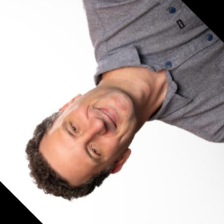

In [ ]:
t3 = transforms.Compose([transforms.RandomRotation((-180, 180)),
                         transforms.Resize(256),
                         transforms.CenterCrop(224)])
paul_transformed = t3(paul)
display(paul_transformed)

You can also jitter the color of an image.

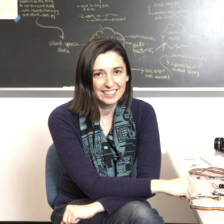

In [ ]:
t3 = transforms.Compose([transforms.Resize(256),
                         transforms.CenterCrop(224),
                         transforms.ColorJitter(brightness=0.5,
                                                saturation=0.5)])
sam_transformed = t3(sam)
display(sam_transformed)